In [1]:
import pandas as pd
import numpy as np
import codecs
import seaborn as sns

# Final Project Report

- written by: Zening Li, Le Qin, Qingxu Wang

## 1. Dataset and motivation slide

Our dataset is about drug products in the United States. We found the data in https://www.fda.gov/Drugs/InformationOnDrugs/ucm142438.htm. The reason we collect the data is that drug abuse is an extreme issue in the United States. Drugs need to organized and controlled by the government. Also, Sometimes we wish to purchase OTC drugs, there is no list about the dosage and the curative effect, so it is hard to purchase the right drugs. We need to search for each individual drug we wish to purchase. Thus, we want to reorganize this raw dataset as a guide of drugs. We also want to find out which type of drugs and which form of dosage is more reliable.
    
The data contains: ProductID which is the concatenation of the NDCproduct code and SPL documentID, ProductNDC which is the labeler code and product code segments of the National Drug Code number, ProductTypeName which is the type of product, ProprietaryName which is the trade name, ProprietaryNameSuffix which is the suffix to the proprietary name, NonProprietaryName which is the active ingredient(s) of the product, DosageFormName which is the translation of the DosageForm Code, RouteName which is the translation of the Route Code, StartMarketingDate which is the starting date of its marketing of the drug product, EndMarketingDate which is the ending date the product will no longer be available on the market, MarketingCategoryName which is the final marketed product categories, LabelerName which is the name of the company, SubstanceName which is the active ingredient list, StrengthNumber which is the strength values of each active ingredient, StrengthUnit which is the units to be used with the strength values, Pharm_Classes which is the reported pharmacological class categories, DEASchedule which is the assigned DEA Schedule number, NDC_Exclude_Flag which is check whether the product has been removed/excluded from the NDC Directory for failure to respond to FDA’s requests for correction to deficient or non-compliant submissions, Listing_Record_Certified_Through which it the date when the listing record will expire.

## 2. Actual task definition/Research Question

There are several real-world questions we wish to solve; the first question is the data is a raw data so there are a lot of duplication and misleading. For example, the data contains two different drugs but with same curative effect or two different drugs with same name but different curative effect. Also, it contains drugs which is not approved to use today. If people read the raw data and wish to purchase the medicine, the duplicate and misleading parts make people do not know what the right medicine is to choose. The raw dataset will cause a lot of trouble. if people wish to purchase a medicine in a rush, read the raw dataset will waste lots of time on finding the right medicine. Thus, our goal is to make this dataset readable and remove all the misleading and duplicate part so that this dataset will become the guide for people to purchase medicine in the United States. Also, it is easier for doctors to offer prescriptions because the dataset is more readable. The input is the raw dataset. The output is the clean dataset.

The second question is that we want know what is the time period for most of the drugs publish to the public and why most of the drugs published to public in that period. The input is the STARTMARKETINGDATE. The output is the distribution of the year and the distribution of the month.

The third question is that we want to count all the OTC drug dosage form. The reason is that OTC drug is people normally use. However, sometimes before people purchase the drug, they need to know how to use the drug. For example, if someone allergy with capsule they need to purchase other form of drug with the same effect. Thus, it is better to combine the drugs. The input are the PRODUCTTYPENAME, DOSAGEFORMNAME, STARTMARKETINGDATE. The output are the bar chart of the product type and the sum number for each type, and the violin plot with product type and start marketing date, and the box plot of Dosage form for OTC drug with the sum number for each form.

The forth question is that we want to know which form of drug is more reliable. From our point of view, the longer the form of drug in the public the better reliability it have. The input are DOSAGEFORMNAME and STARTMARKETINGDATE. The output are the boxplots of each dosage in each time period.

## 3. Literature review

### Comparing Generic and Innovator Drugs: A Review of 12 Years of Bioequivalence Data from the United States Food and Drug Administration
https://journals.sagepub.com/doi/abs/10.1345/aph.1m141
This research is about "orally administered generic drug products". The objective for this paper is "to evaluate how well the bioequivalence measures of generic drugs approved in the US over a 12-year period compare with those of their corresponding innovator counterparts". They are using the FDA data from 1996 to 2007. The result from this research is that "the generic product AUC differed from that of the innovator product by less than 10%".

### Use of Prescription Antiobesity Drugs in the United States
https://accpjournals.onlinelibrary.wiley.com/doi/abs/10.1002/phar.1342
This research is about the "antiobesity drug use in the United States". The data source from "The IMS Health Vector One National and Total Patient Tracker and Encuity Research Treatment Answers databases, the Source Healthcare Analytics Source Lx database, and IMS LifeLink database". The time to analyze is between 1991 to 2001. The result is that "Eighty‐five percent of antiobesity drug users were female, 62% were aged 17–44 years, and 4.5% had a body mass index of ≤ 24.9 kg/m2", and the "duration of use was generally short".

### Breast Cancer and Use of Nonsteroidal Anti-inflammatory Drugs: A Meta-analysis
https://academic.oup.com/jnci/article/100/20/1439/899554
This research is about use datas to "examined the association between risk of breast cancer and use of NSAIDs". The time between January 1, 1966 to July 1, 2008.  The result shows that "NSAID use was associated with reduced risk for breast cancer (relative risk [RR] = 0.88, 95% confidence interval [CI] = 0.84 to 0.93)". Thus this have enough information to show NSAID reduce the chance to get breast cancer.


Compared to these research project, we are doing different analyze. However, we all wants to analyze the drugs in the United States with different time period. The different things is that we want to analyze more than one major part. We wish to use the data to provide customer or doctor a prespective on which type of drug or which form of dosage is more reliable. 

## 4. Data Cleaning

In [2]:
# open the file
product = pd.read_csv('product.csv', encoding = "ISO-8859-1")

From the original Data, there is a unusual thing we had discover. There are a lot of ingredient unit in the data. The ingredient unit depends on the type of the drug. Although we wish to convert all the units into one unit, different type of drugs cannot convert to the same type of drug. Therefore, we ignore the problem.

We convert all the date into date format and remove all the product which is already get out from the market. Also for null value in the end market data attribute, we wish to keep all the null value because this provides that this product is not going to be out of market soon.

When we convert the date, all the date type are float type which is not ususal for the date. From our point of view, even if the data is mess the date should be integer type. There is no reason why this is happen so we think this is unusual.

In [3]:
# convert time into time format
product['ENDMARKETINGDATE'] = pd.to_datetime(product['ENDMARKETINGDATE'], format='%Y%m%d', errors='ignore')
# remove all the products which are out of date
product = product[(product['ENDMARKETINGDATE']>'2019-03-16') | (product['ENDMARKETINGDATE'].isnull())]
product['STARTMARKETINGDATE'] = pd.to_datetime(product['STARTMARKETINGDATE'], format='%Y%m%d', errors='ignore')
product['LISTING_RECORD_CERTIFIED_THROUGH'] = pd.to_datetime(product['LISTING_RECORD_CERTIFIED_THROUGH'], format='%Y%m%d', errors='ignore')
product.head()

,PRODUCTID,PRODUCTNDC,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE,NDC_EXCLUDE_FLAG,LISTING_RECORD_CERTIFIED_THROUGH
0,0002-0800_4bb5d1cb-0fa7-48c7-9f6d-8d45f9b91649,0002-0800,HUMAN OTC DRUG,Sterile Diluent,NaN,diluent,"INJECTION, SOLUTION",SUBCUTANEOUS,1987-07-10,NaT,NDA,NDA018781,Eli Lilly and Company,WATER,1,mL/mL,NaN,NaN,N,2019-12-31
1,0002-1200_957ee1b5-dfa7-4e3f-96e1-6bed1ffc0abe,0002-1200,HUMAN PRESCRIPTION DRUG,Amyvid,NaN,Florbetapir F 18,"INJECTION, SOLUTION",INTRAVENOUS,2012-06-01,NaT,NDA,NDA202008,Eli Lilly and Company,FLORBETAPIR F-18,51,mCi/mL,"Radioactive Diagnostic Agent [EPC],Positron Em...",NaN,N,2019-12-31
2,0002-1407_14757f9d-f641-4836-acf3-229265588d1d,0002-1407,HUMAN PRESCRIPTION DRUG,Quinidine Gluconate,NaN,Quinidine Gluconate,SOLUTION,INTRAVENOUS,1950-07-12,NaT,NDA,NDA007529,Eli Lilly and Company,QUINIDINE GLUCONATE,80,mg/mL,"Antiarrhythmic [EPC],Cytochrome P450 2D6 Inhib...",NaN,N,2019-12-31
3,0002-1433_7b0ec07f-bffa-467f-978a-45b1315107e5,0002-1433,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,2014-09-18,NaT,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,0.75,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN,N,2019-12-31
4,0002-1434_7b0ec07f-bffa-467f-978a-45b1315107e5,0002-1434,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,2014-09-18,NaT,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,1.5,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN,N,2019-12-31


We drop some columns which is not useful for our project.

In [4]:
# drop useless column
product = product.drop(columns=['DEASCHEDULE'])
product = product.drop(columns=['NDC_EXCLUDE_FLAG'])
product = product.drop(columns=['PROPRIETARYNAMESUFFIX'])
product.head()

,PRODUCTID,PRODUCTNDC,PRODUCTTYPENAME,PROPRIETARYNAME,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,LISTING_RECORD_CERTIFIED_THROUGH
0,0002-0800_4bb5d1cb-0fa7-48c7-9f6d-8d45f9b91649,0002-0800,HUMAN OTC DRUG,Sterile Diluent,diluent,"INJECTION, SOLUTION",SUBCUTANEOUS,1987-07-10,NaT,NDA,NDA018781,Eli Lilly and Company,WATER,1,mL/mL,NaN,2019-12-31
1,0002-1200_957ee1b5-dfa7-4e3f-96e1-6bed1ffc0abe,0002-1200,HUMAN PRESCRIPTION DRUG,Amyvid,Florbetapir F 18,"INJECTION, SOLUTION",INTRAVENOUS,2012-06-01,NaT,NDA,NDA202008,Eli Lilly and Company,FLORBETAPIR F-18,51,mCi/mL,"Radioactive Diagnostic Agent [EPC],Positron Em...",2019-12-31
2,0002-1407_14757f9d-f641-4836-acf3-229265588d1d,0002-1407,HUMAN PRESCRIPTION DRUG,Quinidine Gluconate,Quinidine Gluconate,SOLUTION,INTRAVENOUS,1950-07-12,NaT,NDA,NDA007529,Eli Lilly and Company,QUINIDINE GLUCONATE,80,mg/mL,"Antiarrhythmic [EPC],Cytochrome P450 2D6 Inhib...",2019-12-31
3,0002-1433_7b0ec07f-bffa-467f-978a-45b1315107e5,0002-1433,HUMAN PRESCRIPTION DRUG,Trulicity,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,2014-09-18,NaT,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,0.75,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",2019-12-31
4,0002-1434_7b0ec07f-bffa-467f-978a-45b1315107e5,0002-1434,HUMAN PRESCRIPTION DRUG,Trulicity,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,2014-09-18,NaT,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,1.5,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",2019-12-31


We remove the duplicate in our data by the product NDC number and the numerator strength for drugs. The reason we do this is that there are drugs which have same product NDC number. We could consider these drugs are the same drug so we only need these drugs once. However, some drug have the same product NDC number but different numerator strength so we need to consider them as separate drugs. This is the reason we use product NDC number and the numerator strength to remove the duplicate.

In [5]:
product = product.drop_duplicates(['PRODUCTNDC','ACTIVE_NUMERATOR_STRENGTH'])
product.head()

,PRODUCTID,PRODUCTNDC,PRODUCTTYPENAME,PROPRIETARYNAME,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,LISTING_RECORD_CERTIFIED_THROUGH
0,0002-0800_4bb5d1cb-0fa7-48c7-9f6d-8d45f9b91649,0002-0800,HUMAN OTC DRUG,Sterile Diluent,diluent,"INJECTION, SOLUTION",SUBCUTANEOUS,1987-07-10,NaT,NDA,NDA018781,Eli Lilly and Company,WATER,1,mL/mL,NaN,2019-12-31
1,0002-1200_957ee1b5-dfa7-4e3f-96e1-6bed1ffc0abe,0002-1200,HUMAN PRESCRIPTION DRUG,Amyvid,Florbetapir F 18,"INJECTION, SOLUTION",INTRAVENOUS,2012-06-01,NaT,NDA,NDA202008,Eli Lilly and Company,FLORBETAPIR F-18,51,mCi/mL,"Radioactive Diagnostic Agent [EPC],Positron Em...",2019-12-31
2,0002-1407_14757f9d-f641-4836-acf3-229265588d1d,0002-1407,HUMAN PRESCRIPTION DRUG,Quinidine Gluconate,Quinidine Gluconate,SOLUTION,INTRAVENOUS,1950-07-12,NaT,NDA,NDA007529,Eli Lilly and Company,QUINIDINE GLUCONATE,80,mg/mL,"Antiarrhythmic [EPC],Cytochrome P450 2D6 Inhib...",2019-12-31
3,0002-1433_7b0ec07f-bffa-467f-978a-45b1315107e5,0002-1433,HUMAN PRESCRIPTION DRUG,Trulicity,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,2014-09-18,NaT,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,0.75,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",2019-12-31
4,0002-1434_7b0ec07f-bffa-467f-978a-45b1315107e5,0002-1434,HUMAN PRESCRIPTION DRUG,Trulicity,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,2014-09-18,NaT,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,1.5,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",2019-12-31


The missing values are major in DEASCHEDULE, PROPRIETARYNAMESUFFIX, and ENDMARKETINGDATE attributes. The way we are dealing with missing values is that we remove the columns DEASCHEDULE and PROPRIETARYNAMESUFFIX. The reason is that these two columns could not answer our research questions. For the ENDMARKETINGDATE, we use this as a guide to show that the drugs which end date is missing is more reliable because missing value means the drugs is not going to leave the market soon. Thus, the drugs have better positive effect to people. The rest of the missing value we keep them in the dataset. The reason is that there are only a few missing values so it does not affect the whole visualizations of data.

In [10]:
product.describe(include = 'all')

,PRODUCTID,PRODUCTNDC,PRODUCTTYPENAME,PROPRIETARYNAME,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,LISTING_RECORD_CERTIFIED_THROUGH
count,122188,122188,122188,122184,122182,122188,120171,122183,3537,122188,104618,122188,119694,119693,119694,52593,118649
unique,122188,122085,7,45543,22202,136,203,7661,743,11,10910,9180,12447,12337,3824,1772,4
top,67046-042_8ab4fb43-045f-4104-bd62-55f8d3bae95a,65121-001,HUMAN OTC DRUG,Ibuprofen,Ibuprofen,TABLET,ORAL,1972-08-29 00:00:00,2019-12-31 00:00:00,ANDA,part352,"Nelco Laboratories, Inc.",ALCOHOL,10,mg/1,Non-Standardized Pollen Allergenic Extract [EP...,2019-12-31 00:00:00
freq,1,5,63544,637,1047,19775,64552,2428,273,42970,11707,2362,2795,5472,40740,1930,81198
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01 00:00:00,2019-03-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-31 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-18 00:00:00,2038-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-31 00:00:00


From the descriptive statistics we find that we do not actually have a nemerical column.  Is Active_numerator_strength nemerical?  No, since they have different units, the numerical comparison can be meaningless.  From the summary we can find which is the most showed value in each column, also we can find its frequency.  Also, the count and how many unique rows for each column is shown, we can easily know which column has duplicates and how many duplicates.  The max and min value (though not numerical) are displayed also.  For example, PRODUCTNDC has 122188 values in total and 122085 unique values, this mean there's about 100 duplicated values.  Why didn't we remove all these values?  Because some of them may have different curative effect, we can consider them as different drugs, so ignore them.  The top shown NDC is 65121-001, it shows up 5 times, first and last since pandas doesn't know how to compare such values, there is none.

## Visualization

This visualization shows that between 2010-2020 is the peak of drugs releasing, most drugs are invented and applied to used in such time. This visualzation can answer part of the second real world question above. The reason is that this can shows that most of the drugs publish to the market between 2010 to 2020. So it can prove that between 2010 to 2020 the market for drugs is wonderful. Also, from 1900 to 1960, although there is a peak around 1940, compared to the year after 1960, we can see drugs does not developed much. From our point of view, the major reason should be the development of computer because after 1960 computer become more useful to medical industry. This visualization helps us to understand the distribution of data.

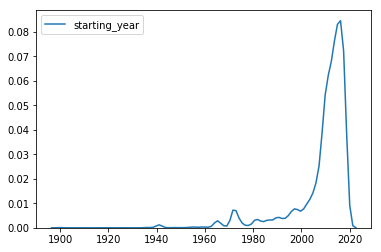

In [11]:
starting_year = product['STARTMARKETINGDATE'].dt.year
product.loc[: , 'starting_year'] = starting_year
sns.kdeplot(product['starting_year' ].dropna())

This is the number of products for each type of drug. This shows that OTC drug have the most number in the market. This is the reason we want to asked the third real-world question: to analyze the type of drug which have the most number in the public.

In [12]:
product.groupby('PRODUCTTYPENAME').size()

PRODUCTTYPENAME
CELLULAR THERAPY                   7
HUMAN OTC DRUG                 63544
HUMAN PRESCRIPTION DRUG        55528
NON-STANDARDIZED ALLERGENIC     2543
PLASMA DERIVATIVE                313
STANDARDIZED ALLERGENIC          144
VACCINE                          109
dtype: int64

This is dosage form followed by mean year of releasing. We could use this to find out which form of drug is the newest and which is the oldest. This can answer our forth real-world question.

In [13]:
mean_start_year = product.groupby('DOSAGEFORMNAME').mean()
mean_start_year.head()

,starting_year
DOSAGEFORMNAME,
AEROSOL,2012.000000
"AEROSOL, FOAM",2009.193548
"AEROSOL, METERED",2011.202532
"AEROSOL, POWDER",2010.157895
"AEROSOL, SPRAY",2014.370526


This is the newest dosage form

In [14]:
mean_start_year['starting_year'].idxmax()

'INJECTION, LIPID COMPLEX'

This is the newest dosage form

In [15]:
mean_start_year['starting_year'].idxmin()

'INJECTION, SOLUTION'

We also plot releasing month to see in which month the most drugs are released. This could also answer the forth real-world question. The result shows that January is the month with most drugs released and November is the least. This visualization also helps us to understand the distribution of data.

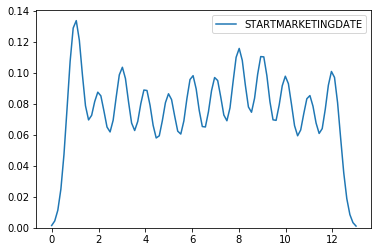

In [16]:
starting_month = product['STARTMARKETINGDATE'].dt.month
sns.kdeplot(starting_month.dropna())

In [17]:
starting_month.value_counts().idxmax()

1.0

In [18]:
starting_month.value_counts().idxmin()

11.0

This part we created a new df named dosage_frame containg cleaned_dosage. It's also a part of data cleaning, then we created boxplot year vs dosage. This could answer the forth real-world question.

In [19]:
dosage_format = product['DOSAGEFORMNAME'].str.split(',')
dosage_format_lst = [i[0] for i in dosage_format]
product.loc[: , 'dosage_form'] = dosage_format_lst
dosage = product.groupby(['dosage_form']).size().to_frame()
# Only with those types more than 2000
dosage = dosage.loc[dosage[0] > 2000]
#dosage
dosage.idxmax()
# So tablet is the most used form of drugs 

0    TABLET
dtype: object

In [20]:
dosage_frame = product
dosage_frame.loc[: ,'dosage'] = dosage_format_lst
dosage_frame.head()


,PRODUCTID,PRODUCTNDC,PRODUCTTYPENAME,PROPRIETARYNAME,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,LISTING_RECORD_CERTIFIED_THROUGH,starting_year,dosage_form,dosage
0,0002-0800_4bb5d1cb-0fa7-48c7-9f6d-8d45f9b91649,0002-0800,HUMAN OTC DRUG,Sterile Diluent,diluent,"INJECTION, SOLUTION",SUBCUTANEOUS,1987-07-10,NaT,NDA,NDA018781,Eli Lilly and Company,WATER,1,mL/mL,NaN,2019-12-31,1987.0,INJECTION,INJECTION
1,0002-1200_957ee1b5-dfa7-4e3f-96e1-6bed1ffc0abe,0002-1200,HUMAN PRESCRIPTION DRUG,Amyvid,Florbetapir F 18,"INJECTION, SOLUTION",INTRAVENOUS,2012-06-01,NaT,NDA,NDA202008,Eli Lilly and Company,FLORBETAPIR F-18,51,mCi/mL,"Radioactive Diagnostic Agent [EPC],Positron Em...",2019-12-31,2012.0,INJECTION,INJECTION
2,0002-1407_14757f9d-f641-4836-acf3-229265588d1d,0002-1407,HUMAN PRESCRIPTION DRUG,Quinidine Gluconate,Quinidine Gluconate,SOLUTION,INTRAVENOUS,1950-07-12,NaT,NDA,NDA007529,Eli Lilly and Company,QUINIDINE GLUCONATE,80,mg/mL,"Antiarrhythmic [EPC],Cytochrome P450 2D6 Inhib...",2019-12-31,1950.0,SOLUTION,SOLUTION
3,0002-1433_7b0ec07f-bffa-467f-978a-45b1315107e5,0002-1433,HUMAN PRESCRIPTION DRUG,Trulicity,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,2014-09-18,NaT,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,0.75,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",2019-12-31,2014.0,INJECTION,INJECTION
4,0002-1434_7b0ec07f-bffa-467f-978a-45b1315107e5,0002-1434,HUMAN PRESCRIPTION DRUG,Trulicity,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,2014-09-18,NaT,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,1.5,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",2019-12-31,2014.0,INJECTION,INJECTION


In [21]:
dosage_frame = dosage_frame.loc[dosage_frame['dosage'].isin(dosage.index)]

This is the boxplot of  the relationship between chosen dosage_form and year into market. We could find some outliers in this data. From our point of view, most of the outlier after 1960 could shows that there are several peak for dosage form innovation. So there are more than one technology revolution for dosage form. Thus, these outliers are useful.

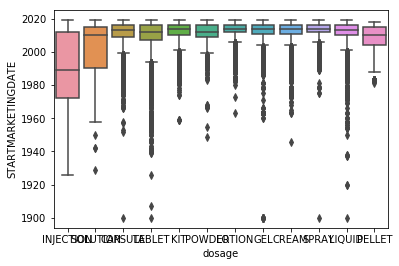

In [22]:
sns.boxplot(x=dosage_frame['dosage'], y=dosage_frame['STARTMARKETINGDATE'].dt.year, data=dosage_frame)

This is the bar chart of which product type is popular in the market. From the result we know that human OTC drug is popular so this is the reason we wish to analyze human OTC drug in the third real-word question.

/home/wangqingxu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


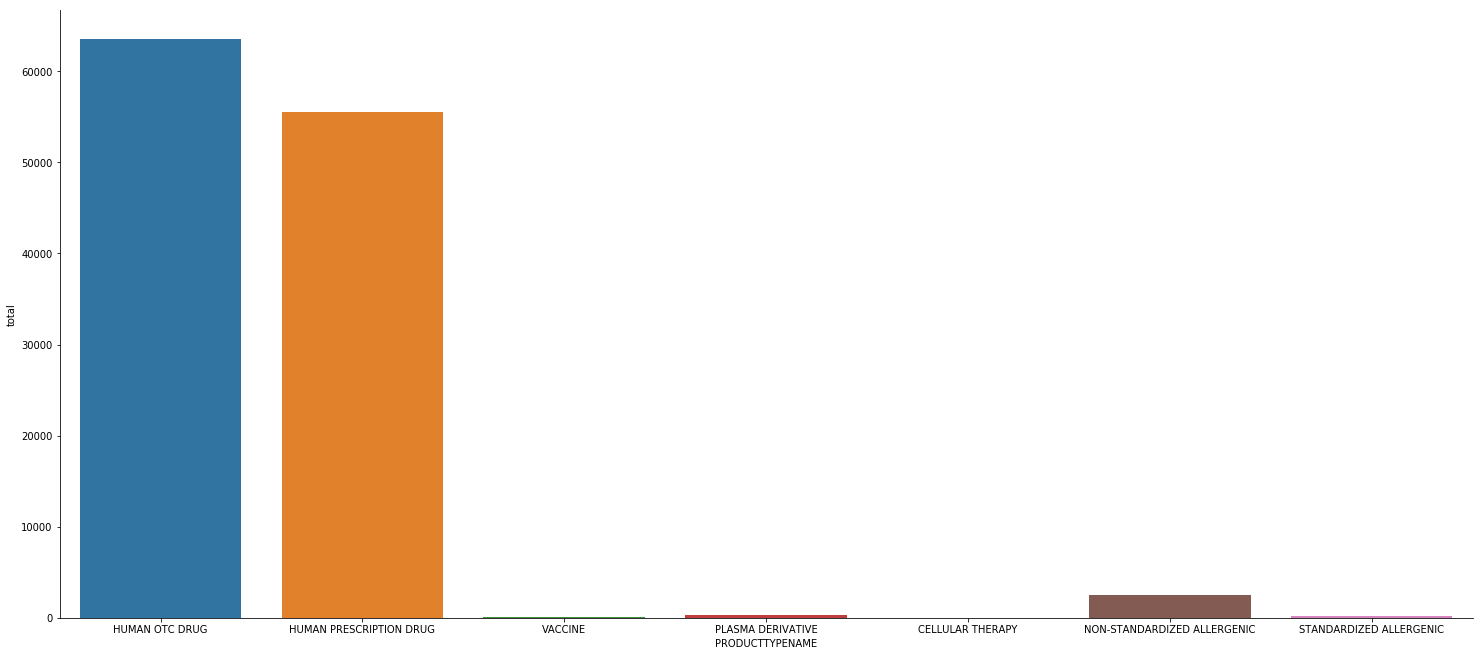

In [23]:
labeler = product[['PRODUCTTYPENAME']]
labeler['total'] = labeler.groupby(['PRODUCTTYPENAME'])['PRODUCTTYPENAME'].transform('count')
labeler = labeler.drop_duplicates(['PRODUCTTYPENAME'])

g = sns.catplot(x="PRODUCTTYPENAME", y="total", kind="bar", data=labeler)
g.fig.set_size_inches(30,10)

The vilent plot also shows the same result as the bar chart

/home/wangqingxu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


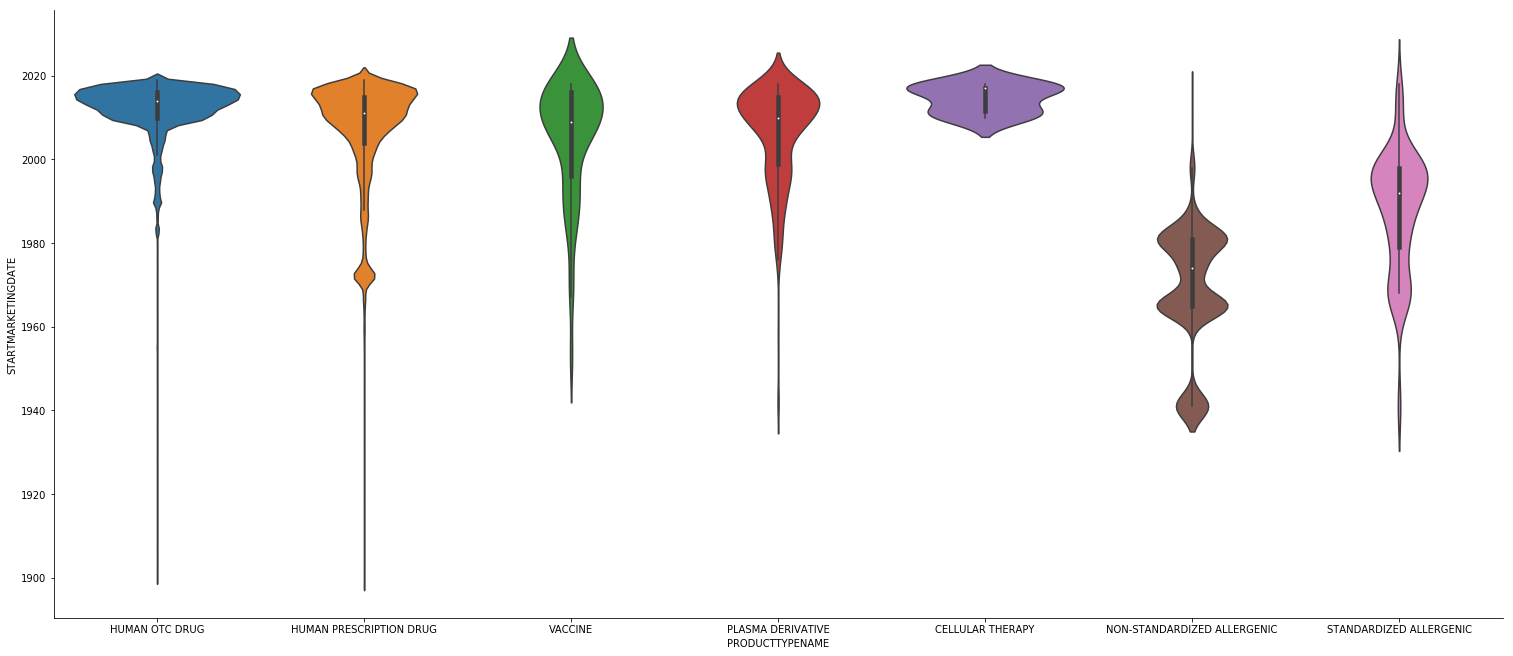

In [24]:
product_start = product[product['STARTMARKETINGDATE'].notna()]
product_start['STARTMARKETINGDATE'] = product_start['STARTMARKETINGDATE'].dt.year
g = sns.catplot(x="PRODUCTTYPENAME", y="STARTMARKETINGDATE", kind="violin", data=product_start);
g.fig.set_size_inches(30,10)

This is the box plot of shows the distribution of dosage form of all the OTC drugs. There is a form which is a lot higher than others so this form is dosage form most people use. This answer the third real-world question. The most useful form is LIQUID and the least useful form is CAPSULE, DELAYED RELEASE PELLETS.

/home/wangqingxu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


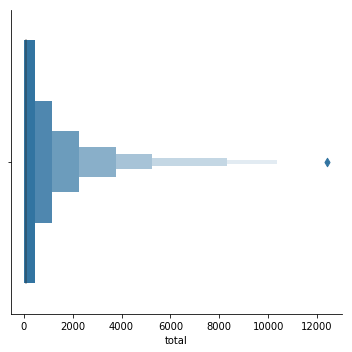

In [25]:
otc = product.loc[product['PRODUCTTYPENAME'] == 'HUMAN OTC DRUG']
Otc = otc[['DOSAGEFORMNAME']]
Otc['total'] = otc.groupby(['DOSAGEFORMNAME'])['DOSAGEFORMNAME'].transform('count')
Otc = Otc.drop_duplicates(['DOSAGEFORMNAME'])

sns.catplot(x='total', kind="boxen", data=Otc)


In [26]:
Otc1 = Otc.groupby('DOSAGEFORMNAME').sum()
Otc1
Otc1['total'].idxmax()

'LIQUID'

In [27]:
Otc1['total'].idxmin()

'CAPSULE, DELAYED RELEASE PELLETS'